In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.fcn_alexnet_model import FcnAlexnetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/fcn_alexnet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: default
batch_size: 2
checkpoint_dir: ./experiments\fcn_alexnet_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: fcn_alexnet_kittiroad
image_size:
- 320
- 960
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 10
num_iter_per_epoch: 100
summary_dir: ./experiments\fcn_alexnet_kittiroad\summary/



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (578, 320, 960, 3)
Size of masks collection :  (578, 320, 960)


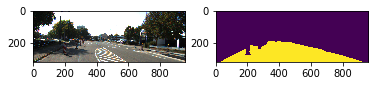

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("train_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [ ]:
model = FcnAlexnetModel(config)
model.build()

In [3]:
sess = tf.Session()
logger = Logger(sess,config)
trainer = RoadTrainer(sess,model,data,config,logger)
model.load(sess)
trainer.train()

Model built successfully.
Variables initialized
Loading model checkpoint ./experiments\fcn_alexnet_kittiroad\checkpoint/-400 ...

INFO:tensorflow:Restoring parameters from ./experiments\fcn_alexnet_kittiroad\checkpoint/-400
Model loaded
Epoch  3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:51<00:00,  3.52s/it]


-->Last epoch loss     :  1.4538236
-->Last epoch accuracy :  0.000328125
-->Last test loss      :  1.3787266
-->Last test accuracy  :  0.0004375
[BEST LOST : 1.378726601600647]
Saving model...
Model saved
Epoch  4


  1%|▊                                                                                 | 1/100 [00:03<05:51,  3.55s/it]


KeyboardInterrupt: 

In [ ]:
test = [data.get_data_element("test_data",i) for i in range(20)]
model.load(sess)
for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)

In [ ]:
sess.close()

In [ ]:
with tf.Session() as sess : 
    test = [data.get_data_element("test_data",i) for i in range(20)]
    logger = Logger(sess,config)
    trainer = RoadTrainer(sess,model,data,config,logger)
    model.load(sess)
    for item in test :
        img = item[0]
        mask = item[1]
        model.predict(sess,img,mask)